# Automatic Dog Door using Keras

We will be making an automatic door that only allow dogs to pass through! If the animal is a cat, then we keep them inside, other animals can stay out!! 

### Our Objectives

* Using Keras to a load a well pre-trained model (VGG16)
* Preprocessing our images to work with the pretrained model
* Using pretrained model to perform accurate inference on our images

### Importing Libraries

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We will be loading the VGG16 network which has been pre-trained on the ImageNet Dataset

In [2]:
from tensorflow.keras.applications import VGG16
model = VGG16(weights="imagenet")

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

It can be obsereved that our
* Input dimensions are (224, 224, 3)
* Output dimensions are 1000

The dogs categories are from 151 to 268 and the cats categories are from 281 to 285.
Please check this https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a for more categories

In [4]:
def display_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1200, 1800, 3)


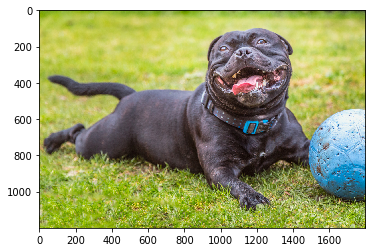

In [6]:
display_image("Images/happy_dog.jpg")

In [7]:
def load_and_preprocess_image(image_path):
    
    print('Original image shape: ', mpimg.imread(image_path).shape)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)  # Converting the image from PIL format to numpy array format
    image = image.reshape(1,224,224,3)       # Adding a dimension for number of images(here 1)
    
    image = preprocess_input(image)          # Preprocessing the image to align with the original ImageNet dataset
    
    print('Processed image shape: ', image.shape)
    return image

In [8]:
processed_image = load_and_preprocess_image("Images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


In [9]:
def readable_prediction(image_path):
    display_image(image_path)
    image = load_and_preprocess_image(image_path)   # Loading and pre-processing our image
    predictions = model.predict(image)              # Making predictions
    # The predictions are going to be in an array format of 1000 elements and it will be difficult to read
    # Hence we will convert it to a more readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.45098123), ('n02110958', 'pug', 0.32263234), ('n02099712', 'Labrador_retriever', 0.0934318)]]


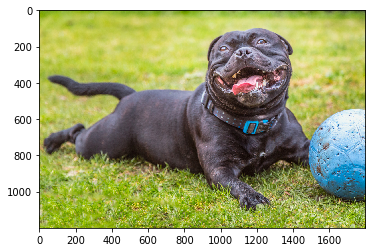

In [10]:
readable_prediction("Images/happy_dog.jpg")

BINGO! It was correctly identified as a Staffordshire Bull Terrier!!

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02123159', 'tiger_cat', 0.7365475), ('n02124075', 'Egyptian_cat', 0.17492668), ('n02123045', 'tabby', 0.04588384)]]


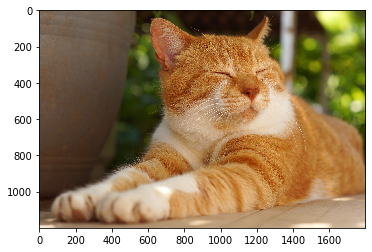

In [11]:
readable_prediction("Images/sleepy_cat.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02132136', 'brown_bear', 0.98538613), ('n02133161', 'American_black_bear', 0.013876267), ('n02410509', 'bison', 0.00026603724)]]


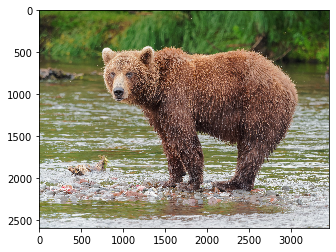

In [12]:
readable_prediction("Images/brown_bear.jpg")

(1250, 1000, 3)
Original image shape:  (1250, 1000, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02129604', 'tiger', 0.76213324), ('n02123159', 'tiger_cat', 0.2369026), ('n02127052', 'lynx', 0.0005033793)]]


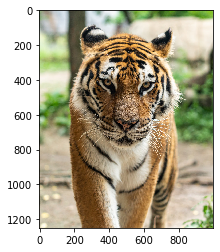

In [13]:
readable_prediction("Images/handsome_tiger.jpg")

(2251, 1500, 3)
Original image shape:  (2251, 1500, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02326432', 'hare', 0.54777), ('n02325366', 'wood_rabbit', 0.45036852), ('n01877812', 'wallaby', 0.0015247464)]]


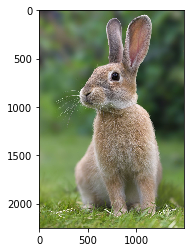

In [14]:
readable_prediction("Images/cute_rabbit.jpg")

(1280, 1920, 3)
Original image shape:  (1280, 1920, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02099601', 'golden_retriever', 0.8886165), ('n02099712', 'Labrador_retriever', 0.091791734), ('n02104029', 'kuvasz', 0.00654592)]]


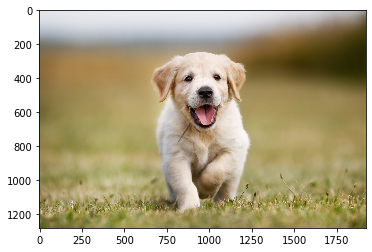

In [15]:
readable_prediction("Images/baby_retriever.jpg")

# Lets have some fun by trying it out on me!

(2316, 3088, 3)
Original image shape:  (2316, 3088, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n04209133', 'shower_cap', 0.12922454), ('n03970156', 'plunger', 0.05290541), ('n02808304', 'bath_towel', 0.05195365)]]


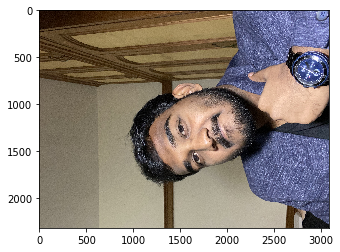

In [16]:
readable_prediction("Images/smiling_sughandhan.jpg")

I certainly do not look like a shower cap, plunger nor a bath towel :(

## Only Dogs!

In [17]:
def dog_door(image_path):
    display_image(image_path)
    image = load_and_preprocess_image(image_path)
    preds = model.predict(image)
    index = np.argmax(preds)     #obtaining the category index
    if index>=151 and index<=268:
        print("Come in Doggy!!")
    elif index>=281 and index<=285:
        print("Kitty, stay inside!!")
    else:
        print("You're not a dog! Stay outside!")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Come in Doggy!!


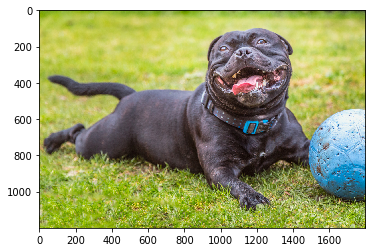

In [19]:
dog_door("Images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Kitty, stay inside!!


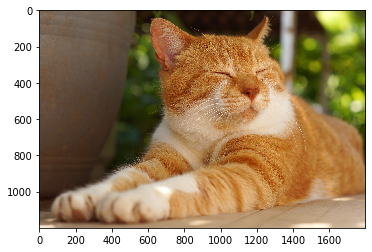

In [20]:
dog_door("Images/sleepy_cat.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


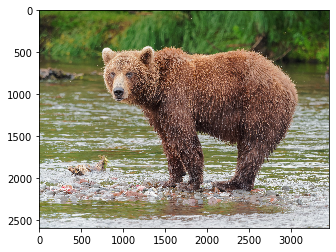

In [21]:
dog_door("Images/brown_bear.jpg")

(2251, 1500, 3)
Original image shape:  (2251, 1500, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


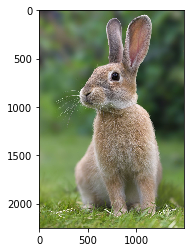

In [22]:
dog_door("Images/cute_rabbit.jpg")

(1250, 1000, 3)
Original image shape:  (1250, 1000, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


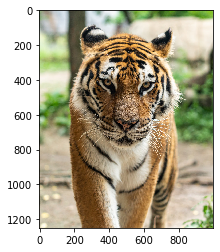

In [23]:
dog_door("Images/handsome_tiger.jpg")

(1280, 1920, 3)
Original image shape:  (1280, 1920, 3)
Processed image shape:  (1, 224, 224, 3)
Come in Doggy!!


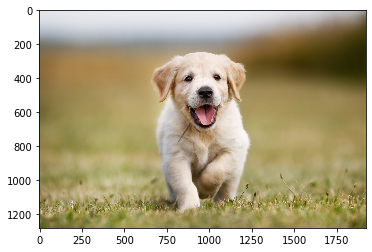

In [24]:
dog_door("Images/baby_retriever.jpg")

## And finally lets see if the dog door allows me inside

(2316, 3088, 3)
Original image shape:  (2316, 3088, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


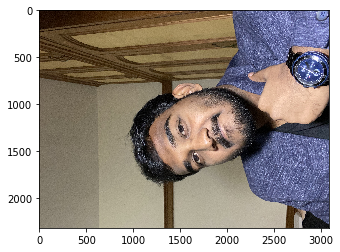

In [25]:
dog_door("Images/smiling_sughandhan.jpg")